## Desciption

This model predicts the expression of a gene in M9, based on the Urtecho 2023 data.

In [1]:
import CNN_Urtecho_LB_M9_expression_1_0 as parent

In [2]:
name = 'CNN_Urtecho_M9_expression_1_0'

In [3]:
import pandas as pd
import numpy as np

# Load data
file_path = '../Data/Urtecho_2023/Urtecho_2023_LB_M9.csv'
df = pd.read_csv(file_path)[['promoter_sequence', 'transformed_M9_expression']]

# filter out sequences where transformed_M9_expression is 0
df = df[df['transformed_M9_expression'] != 0]

# Preprocess data
X = df['promoter_sequence']
y = df['transformed_M9_expression']
X, _ = parent.preprocess_sequences(X)

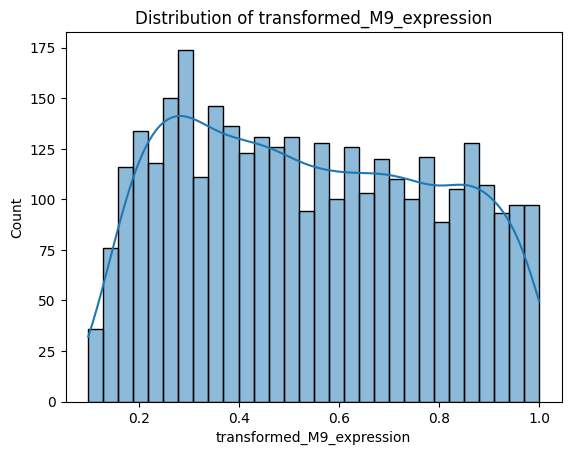

In [4]:
# visualize distribution of transformed_M9_expression

import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(y, bins=30, kde=True)
plt.title('Distribution of transformed_M9_expression')
plt.show()

In [5]:
X.shape

(3426, 2251, 4)

In [6]:
X_train, X_test, y_train, y_test = parent.train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = parent.build_cnn_model(X.shape[1:])
history = parent.train_model(model, X_train, y_train, X_test, y_test)
loss = parent.evaluate_model(model, X_test, y_test)
parent.save_model(model, name)

Epoch 1/150


c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.4356 - val_loss: 0.0338
Epoch 2/150
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0308 - val_loss: 0.0328
Epoch 3/150
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0304 - val_loss: 0.0327
Epoch 4/150
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0299 - val_loss: 0.0338
Epoch 5/150
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0289 - val_loss: 0.0325
Epoch 6/150
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0283 - val_loss: 0.0339
Epoch 7/150
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0257 - val_loss: 0.0357
Epoch 8/150
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0262 - val_loss: 0.0322
Epoch 9/150
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0261 - val_loss: 0.0328
Epoch 10/150
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0218 - val_loss: 0.0328
Epoch 11/150
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0207 - val_loss: 0.0366
Epoch 12/150
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0

108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step


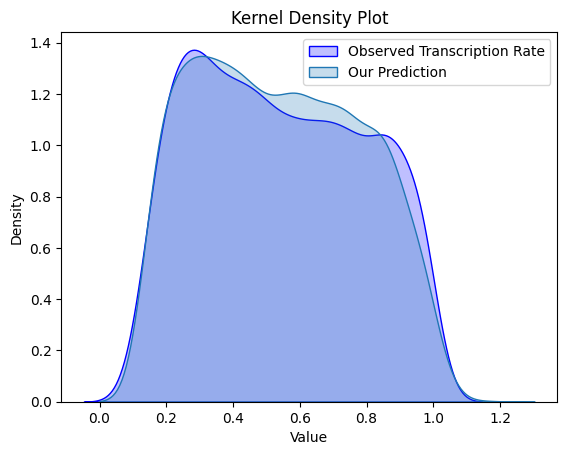

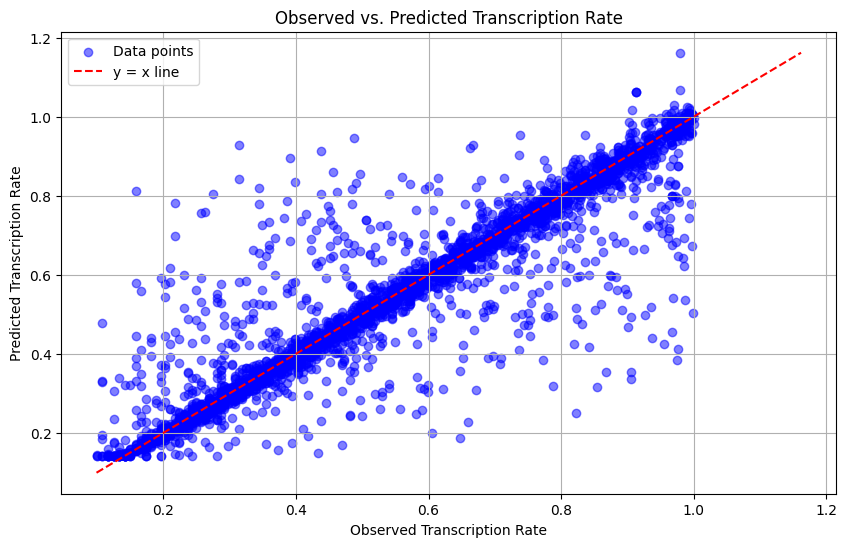

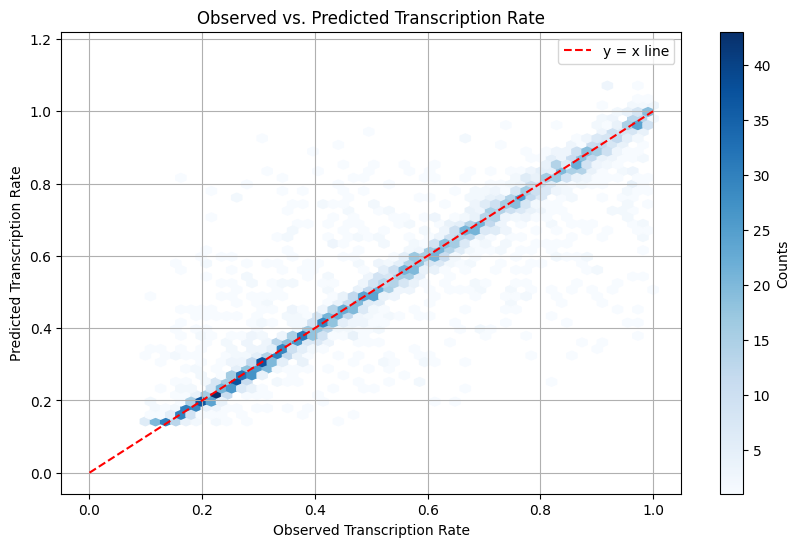

In [8]:
predicted = parent.load_and_predict(name, X)

parent.plot_kde(y, predicted)
parent.plot_scatter(parent.ravel(y), parent.ravel(predicted))
parent.plot_hexbin(y, parent.ravel(predicted))

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


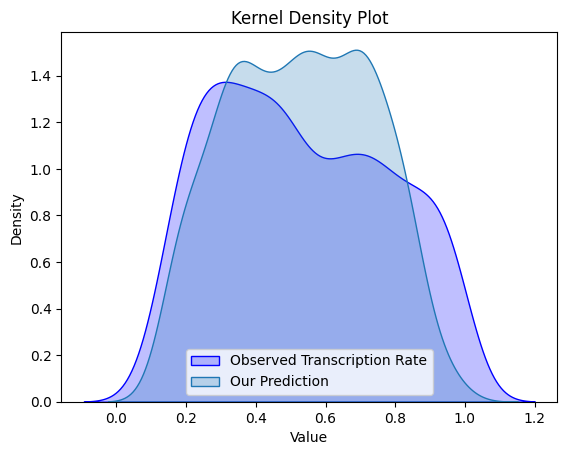

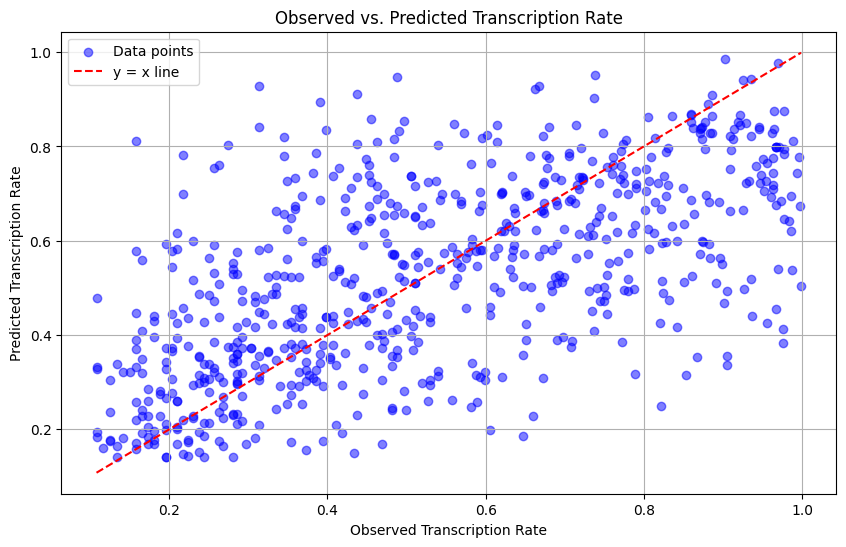

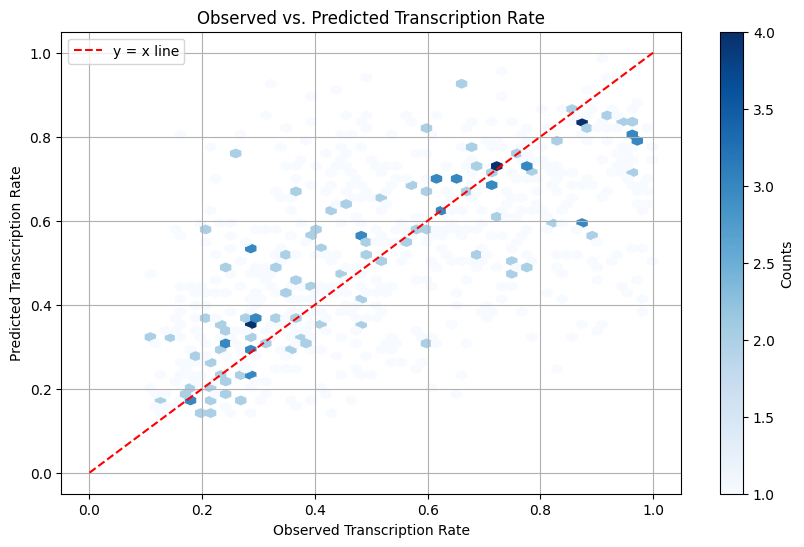

In [9]:
y_pred = parent.load_and_predict(name, X_test)

parent.plot_kde(y_test, y_pred)
parent.plot_scatter(parent.ravel(y_test), parent.ravel(y_pred))
parent.plot_hexbin(y_test, parent.ravel(y_pred))

In [10]:
# Load, predict, and evaluate the best model
y_pred = parent.load_and_predict(name, X_test)
mse, rmse, mae, r2 = parent.calc_metrics(y_test, y_pred)

print('MSE: ', mse)
print('RMSE: ', rmse)
print('MAE: ', mae)
print('R2: ', r2)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
MSE:  0.04105322258456374
RMSE:  0.202615948495087
MAE:  0.15520764443232027
R2:  0.3339487540868872
